# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.4.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [11]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [12]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [13]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [14]:
len(movies)

244914

### List all Batman movies ever made

In [15]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [16]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [17]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [18]:
harry_potter = movies[movies.title.str.contains('Harry Potter', case = False)]
harry_potter.sort_values('year', ascending = False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [19]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [20]:
len(movies[movies['year'] == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [21]:
len(movies[(movies['year'] >= 2000) & (movies['year'] <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [22]:
len(movies[movies.title.str.contains('Hamlet')])

57

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [23]:
Hamlet_df = movies[(movies.title.str.contains('Hamlet')) & (movies.year >= 2000)]
Hamlet_df.sort_values('year')

,title,year
55639,Hamlet,2000
55525,Hamlet in the Hamptons,2002
137905,Hamlet_X,2003
218468,Hamlet X,2004
40045,Hamlet (II),2005
152920,"Dogg's Hamlet, Cahoot's Macbeth",2005
200246,The Tragedy of Hamlet Prince of Denmark,2007
176528,Hamlet (II),2007
156899,Hamlet (III),2007
52408,Hamlet the Vampire Slayer,2008


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [49]:
inception_df =  cast[(cast['title'] =='Inception') & (cast['n'].isnull())].groupby('character')
len(inception_df)

21

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [151]:
all_cast = cast[(cast.title == 'Inception')]
n_cast = cast[(cast['title'] =='Inception') & (cast['n'].isnull())]
print('There are', len(all_cast.groupby('character')) - len(n_cast.groupby('character')), 'main cast in Inception')

There are 35 main cast in Inception


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [26]:
top_cast = cast[(cast['title'] =='Inception') & (cast['name'].notnull())].sort_values('n', ascending = False).head(10)
print('The top 10 actors\actresses are:\n',top_cast)

The top 10 actorsctresses are:
              title  year                name     type              character  \
3731263  Inception  2010      Shannon Welles  actress                Old Mal   
833376   Inception  2010         Jack Gilroy    actor               Old Cobb   
2250605  Inception  2010       Jason Tendell    actor       Fischer's Driver   
3473041  Inception  2010  Lisa (II) Reynolds  actress          Private Nurse   
1812091  Inception  2010      Andrew Pleavin    actor            Businessman   
2049179  Inception  2010         Felix Scott    actor            Businessman   
807795   Inception  2010      Michael Gaston    actor    Immigration Officer   
149008   Inception  2010        Peter Basham    actor  Fischer's Jet Captain   
3444628  Inception  2010      Nicole Pulliam  actress          Lobby Sub Con   
3203564  Inception  2010   Alex (II) Lombard  actress          Lobby Sub Con   

            n  
3731263  51.0  
833376   50.0  
2250605  49.0  
3473041  48.0  
181209

### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [27]:
movies_AD = cast[cast['character'] == 'Albus Dumbledore']
print("The movies involving the character of 'Albus Dumbledore' are:\n",movies_AD)

The movies involving the character of 'Albus Dumbledore' are:
                                              title  year                 name  \
704984                                  Epic Movie  2007         Dane Farwell   
792421         Harry Potter and the Goblet of Fire  2005       Michael Gambon   
792423   Harry Potter and the Order of the Phoenix  2007       Michael Gambon   
792424    Harry Potter and the Prisoner of Azkaban  2004       Michael Gambon   
947789     Harry Potter and the Chamber of Secrets  2002       Richard Harris   
947790       Harry Potter and the Sorcerer's Stone  2001       Richard Harris   
1685537                      Ultimate Hero Project  2013  George (X) O'Connor   
2248085                                     Potter  2015    Timothy Tedmanson   

          type         character     n  
704984   actor  Albus Dumbledore  17.0  
792421   actor  Albus Dumbledore  37.0  
792423   actor  Albus Dumbledore  36.0  
792424   actor  Albus Dumbledore  27.0  
94

In [28]:
act_AD = cast[cast['character'] == 'Albus Dumbledore'].groupby('name')
print("The actors who played the character 'Albus Dumbledore' are:")
for name, info in act_AD:
    print(name)

The actors who played the character 'Albus Dumbledore' are:
Dane Farwell
George (X) O'Connor
Michael Gambon
Richard Harris
Timothy Tedmanson


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [29]:
role_KR = cast[cast['name'] == 'Keanu Reeves'].groupby('character')
print("'Keanu Reeves' played", len(role_KR),"roles throughout his career.")

'Keanu Reeves' played 56 roles throughout his career.


In [50]:
role_KR1999 = cast[(cast['name'] == 'Keanu Reeves') & (cast['year'] >= 1999) & (cast['n'].notnull())].sort_values('year')
print("Here are the leading roles that 'Keanu Reeves' played on or after 1999:")
print(role_KR1999[['character','year']].to_string(index=False))

Here are the leading roles that 'Keanu Reeves' played on or after 1999:
           character  year
             Himself  1999
             Dogstar  1999
                 Neo  1999
             Griffin  2000
         Shane Falco  2000
    Donnie Barksdale  2000
         Nelson Moss  2001
       Conor O'Neill  2001
       Julian Mercer  2003
                 Neo  2003
                 Neo  2003
             Dogstar  2005
    John Constantine  2005
         Perry Lyman  2005
          Alex Wyler  2006
          Bob Arctor  2006
Detective Tom Ludlow  2008
              Klaatu  2008
        Chris Nadeau  2009
         Henry Torne  2010
                 Kai  2013
         Donaka Mark  2013
           John Wick  2014
                Evan  2015
               Keanu  2016
                Hank  2016
    Detective Galban  2016
              Ramsey  2016
           The Dream  2016
           John Wick  2017
         Dr. Beckham  2017
          Lucas Hill  2018


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [39]:
role_19 = cast[(cast['year'] >= 1950) & (cast['year'] <= 1960)].groupby('character')
print('There are',len(role_19),'roles availabe from 1950-1960')

There are 139020 roles availabe from 1950-1960


In [32]:
role_20 = cast[(cast['year'] >= 2007) & (cast['year'] <= 2017)].groupby('character')
print('There are',len(role_20),'roles availabe from 2007-2017')

There are 619945 roles availabe from 2007-2017


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [160]:
role_all_2000 = cast[(cast['year'] >= 2000)].groupby('character')
role_nn_2000 = cast[(cast['year'] >= 2000) & (cast['n'].notnull())].groupby('character')
role_sup_2000 = cast[(cast['year'] >= 2000) & (cast['n'].isnull())].groupby('character')
n_all = len(role_all_2000)
n_nn = len(role_nn_2000)
n_sup= len(role_sup_2000)

print('There are',(n_all-n_sup),'leading roles availabe since 2000')

There are 434630 leading roles availabe since 2000


In [159]:
print('There are',n_nn-(n_all-n_sup),'non-leading roles availabe since 2000')

There are 66747 non-leading roles availabe since 2000


In [161]:
print('There are',n_sup,'non-leading roles availabe since 2000')

There are 382872 non-leading roles availabe since 2000


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [162]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

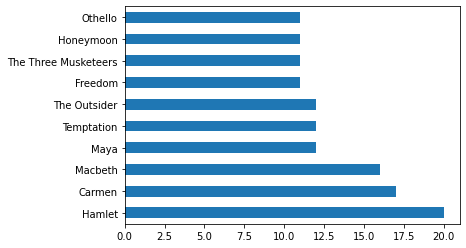

In [163]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [256]:
top_three_2000 = movies.year.value_counts()[:3]
top_three_2000

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:>

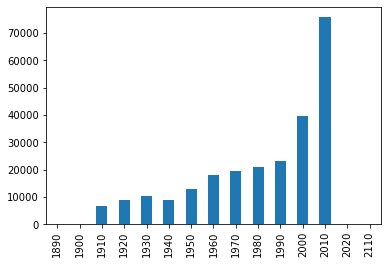

In [262]:
films_per_dec = ((movies.year/10).astype(int)*10).value_counts().sort_index()
films_per_dec.plot(kind = 'bar')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [264]:
top_ten_ch = cast.character.value_counts()[:10]
top_ten_ch

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [268]:
top_ten_her = cast[cast['character']=='Herself'].name.value_counts()[:10]
top_ten_her

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64

In [270]:
top_ten_him = cast[cast['character']=='Himself'].name.value_counts()[:10]
top_ten_him

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [289]:
top_ten_Zom = cast[cast['character'].str.startswith('Zombie')].character.value_counts()[:10]
top_ten_Zom

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [290]:
top_ten_Pol = cast[cast['character'].str.startswith('Police')].character.value_counts()[:10]
top_ten_Pol

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [293]:
roles_KR = cast[cast['name'] == 'Keanu Reeves'].year.value_counts().sort_index()
roles_KR

1985    1
1986    3
1988    4
1989    2
1990    2
1991    3
1992    1
1993    4
1994    1
1995    2
1996    2
1997    2
1999    3
2000    3
2001    2
2003    3
2005    3
2006    2
2008    2
2009    1
2010    1
2012    1
2013    2
2014    1
2015    1
2016    5
2017    3
2018    1
2019    1
Name: year, dtype: int64

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:>

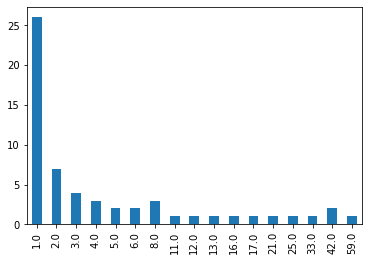

In [295]:
n_KR = cast[cast['name'] == 'Keanu Reeves'].n.value_counts().sort_index()
n_KR.plot(kind = 'bar')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:>

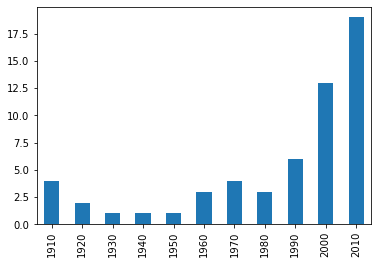

In [302]:
films_Hamlet = ((movies[movies.title.str.contains('Hamlet')].year/10).astype(int)*10).value_counts().sort_index()
films_Hamlet.plot(kind = 'bar')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [310]:
lrole = ((cast[cast.n.notnull()].year/10).astype(int)*10).value_counts()
lrole_1960 = lrole[lrole.index == 1960]
lrole_1960

1960    131316
Name: year, dtype: int64

In [311]:
lrole_2000 = lrole[lrole.index == 2000]
lrole_2000

2000    497847
Name: year, dtype: int64

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [331]:
film_FO = cast[cast['name'] == 'Frank Oz'][['year','title']].value_counts().sort_index()
film_FO2 = film_FO[film_FO[:] >= 2]
film_FO2

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [332]:
role_FO = cast[cast['name'] == 'Frank Oz'][['character']].value_counts()
role_FO2 = role_FO[role_FO[:] >= 2]
role_FO2

character     
Animal            6
Miss Piggy        6
Yoda              6
Cookie Monster    5
Sam the Eagle     5
Fozzie Bear       4
Bert              3
Grover            2
dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

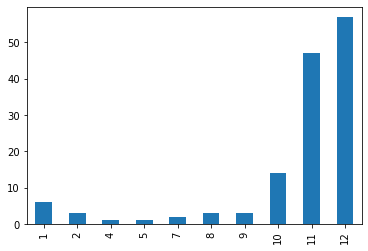

In [333]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

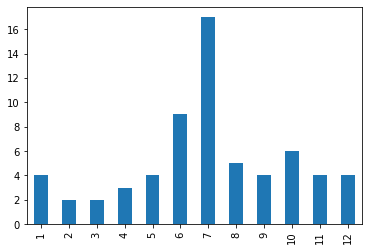

In [336]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind = 'bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

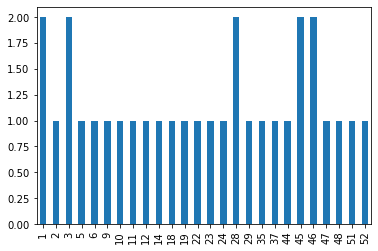

In [338]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind = 'bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [391]:
movie_rel = pd.merge(cast, release_dates, on = ['title','year'], how = 'inner') 
movie_KR = movie_rel[(movie_rel.name == 'Keanu Reeves') & (movie_rel.n.notnull()) & (movie_rel.country == 'USA')]
movie_KR.sort_values('date')

,title,year,name,type,character,n,country,date
16380562,Youngblood,1986,Keanu Reeves,actor,Heaver,12.0,USA,1986-01-31
17989030,River's Edge,1986,Keanu Reeves,actor,Matt,2.0,USA,1987-05-08
16837127,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
16483953,Permanent Record,1988,Keanu Reeves,actor,Chris Townsend,6.0,USA,1988-04-22
8395767,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
18601507,Dangerous Liaisons,1988,Keanu Reeves,actor,Chevalier Danceny,5.0,USA,1989-02-24
14475951,Parenthood,1989,Keanu Reeves,actor,Tod,8.0,USA,1989-05-26
16635217,I Love You to Death,1990,Keanu Reeves,actor,Marlon,6.0,USA,1990-04-06
6011799,Tune in Tomorrow...,1990,Keanu Reeves,actor,Martin Loader,2.0,USA,1990-11-02
11452680,Point Break,1991,Keanu Reeves,actor,Johnny Utah,2.0,USA,1991-07-12


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

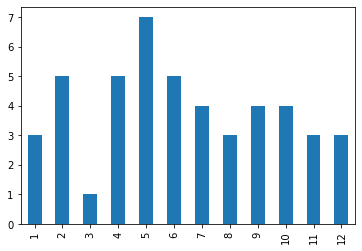

In [395]:
movie_KRr = movie_rel[(movie_rel.name == 'Keanu Reeves') & (movie_rel.country == 'USA')]
movie_KRr.date.dt.month.value_counts().sort_index().plot(kind = 'bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

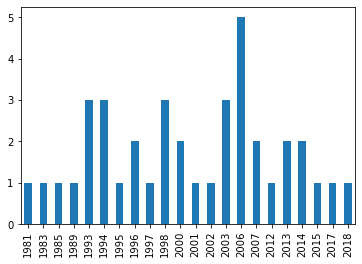

In [398]:
movie_IM = movie_rel[(movie_rel.name == 'Ian McKellen') & (movie_rel.country == 'USA')]
movie_IM.date.dt.year.value_counts().sort_index().plot(kind = 'bar')